### Анализ данных по энергопотреблению

In [1]:
# импортируем библиотеку pandas
import pandas as pd

In [2]:
#загружаем объединенный файл с данными по дневному энергопотреблению в датафрейм
daily_data = pd.read_csv('./data/daily_energy.csv')
#проверяем
daily_data.head()

,LCLid,house_id,day,energy_sum
0,MAC000041,98,2011-12-09,11.301
1,MAC000041,98,2011-12-10,9.929
2,MAC000041,98,2011-12-11,7.936
3,MAC000041,98,2011-12-12,7.500
4,MAC000041,98,2011-12-13,9.753


Посмотрим, как менялось среднее суточное энергопотребление домохозяйств (ССЭД) по годам и месяцам.

In [3]:
#добавим колонку year, вырезав код года из строки day
daily_data['year'] = daily_data['day'].str[:4]
#проверим
daily_data.head()

,LCLid,house_id,day,energy_sum,year
0,MAC000041,98,2011-12-09,11.301,2011
1,MAC000041,98,2011-12-10,9.929,2011
2,MAC000041,98,2011-12-11,7.936,2011
3,MAC000041,98,2011-12-12,7.500,2011
4,MAC000041,98,2011-12-13,9.753,2011


In [4]:
#добавим колонку month, вырезав код месяца из строки day
daily_data['month'] = daily_data['day'].str[5:7]
#проверим
daily_data.head()

,LCLid,house_id,day,energy_sum,year,month
0,MAC000041,98,2011-12-09,11.301,2011,12
1,MAC000041,98,2011-12-10,9.929,2011,12
2,MAC000041,98,2011-12-11,7.936,2011,12
3,MAC000041,98,2011-12-12,7.500,2011,12
4,MAC000041,98,2011-12-13,9.753,2011,12


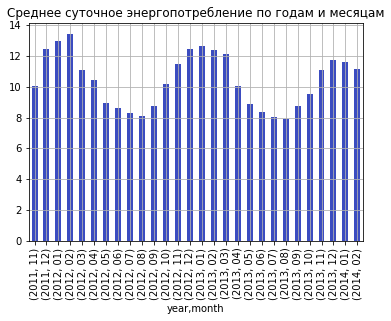

In [6]:
#построим график распределения распределения ССЭД по по годам и месяцам
daily_data.groupby(['year', 'month'])['energy_sum'].mean().plot(kind='bar', x='month',
                                grid = True, 
                                colormap = 'coolwarm', 
                                title = 'Среднее суточное энергопотребление по годам и месяцам')

Видна ярко выраженная сезонность энергопотребления. 

Изучим распределение энергопотребления по дням недели.

In [7]:
#загрузим справочник дней недели по датам 
weekdays = pd.read_csv('./data/weekdays.csv')
#проверим
weekdays.head()

,day,isoweekday
0,2011-11-01,2
1,2011-11-02,3
2,2011-11-03,4
3,2011-11-04,5
4,2011-11-05,6


In [8]:
#добавим в датафрейм daily_data столбец weekday из датафрейма weekdays
daily_data = daily_data.merge(weekdays, on='day', how='left')
#посмотрим на результат
daily_data.head()

,LCLid,house_id,day,energy_sum,year,month,isoweekday
0,MAC000041,98,2011-12-09,11.301,2011,12,5
1,MAC000041,98,2011-12-10,9.929,2011,12,6
2,MAC000041,98,2011-12-11,7.936,2011,12,7
3,MAC000041,98,2011-12-12,7.500,2011,12,1
4,MAC000041,98,2011-12-13,9.753,2011,12,2


In [9]:
#получим распределение среднего энергопотребления домохозяйства по дням недели
daily_data.groupby('isoweekday')['energy_sum'].mean()

isoweekday
1    10.143721
2    10.015564
3    10.013860
4     9.980274
5    10.018266
6    10.256832
7    10.725412
Name: energy_sum, dtype: float64

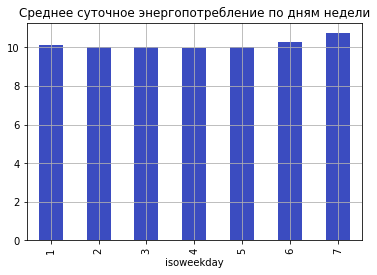

In [11]:
#построим столбчатую диаграмму ССЭД по дням недели
daily_data.groupby('isoweekday')['energy_sum'].mean().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Среднее суточное энергопотребление по дням недели')

Видим незначительный разброс энергопотребления по дням недели с минимумом в четверг и максимумом в воскресенье.

Выясним, как влияют на энергопотребление 2 основных фактора, сязанных с сезонностью: продолжительность светового дня и среднесуточная температура воздуха.

In [12]:
#формируем таблицу среднего энергопотребления домохозяйства за сутки для каждого даты наблюдения,
#построив cводную таблицу
data_pivot = daily_data.pivot_table(index = 'day', values = 'energy_sum', aggfunc = 'mean')
#проверим результат
data_pivot.tail()

,energy_sum
day,
2014-02-23,11.495899
2014-02-24,10.421352
2014-02-25,10.294125
2014-02-26,10.216438
2014-02-27,10.362517


In [13]:
#загрузим сведения о погоде
daily_weather = pd.read_csv('./data/daily_weather.csv')
#проверим
daily_weather.head()

,day,temperatureMax,temperatureMin,daylight
0,2011-11-11,11.96,8.85,32827
1,2011-12-11,8.59,2.48,28551
2,2011-12-27,10.33,8.03,28250
3,2011-12-02,8.07,2.56,29408
4,2011-12-24,8.22,3.17,28180


In [14]:
#сохраним размер датафрейма для проверки
data_pivot_len = len(data_pivot)

#добавим в датафрейм data_pivot столбцы temperatureMax, temperatureMin, daylight из датафрейма daily_weather
data_pivot = data_pivot.merge(daily_weather, on='day', how='left')
#посмотрим на результат
data_pivot.head()

,day,energy_sum,temperatureMax,temperatureMin,daylight
0,2011-11-24,10.728615,12.93,8.56,30514
1,2011-11-25,10.182200,13.03,7.46,30360
2,2011-11-26,10.610687,12.96,7.01,30211
3,2011-11-27,10.850805,13.54,4.47,30066
4,2011-11-28,10.105561,12.58,1.31,29926


In [15]:
#проверим, не возникли ли дубликаты по равенству числа строк исходного и объединенного
#датафреймов
len(data_pivot) == data_pivot_len

True

Все нормально, дубликатов нет.

In [16]:
#построим корреляционную матрицу для датафрейма data_pivot
data_pivot.corr()

,energy_sum,temperatureMax,temperatureMin,daylight
energy_sum,1.000000,-0.884499,-0.836763,-0.795167
temperatureMax,-0.884499,1.000000,0.895433,0.693481
temperatureMin,-0.836763,0.895433,1.000000,0.629800
daylight,-0.795167,0.693481,0.629800,1.000000


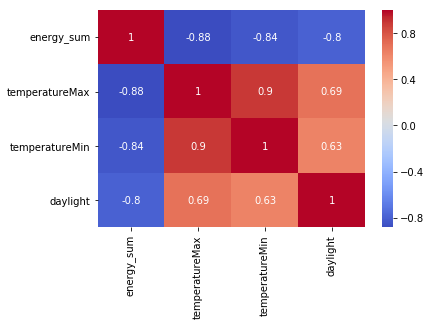

In [17]:
#импортируем библиотеку seaborn
import seaborn as sns
#построим тепловую карту корреляционной матрицы датафрейма data_pivot
sns.heatmap(data_pivot.corr(), annot = True, cmap = 'coolwarm')

Четко видна сильная обратная корреляция среднего энергопотребления с температурой воздуха и продолжительностью светового дня. Также хорошо видно, что продолжительность светового дня и температура воздуха взаимнокоррелированны.

Изучим распределение энергопотребления по домам.

In [18]:
#получим распределение ССЭД по домам
daily_data.groupby('house_id')['energy_sum'].mean().sort_values()

house_id
109     6.142006
92      6.456568
102     6.560510
96      6.659600
108     6.945821
91      6.957859
93      7.106712
97      7.260018
98      7.462123
94      7.470797
105     7.500977
106     7.555133
100     7.576175
55      7.608672
95      7.666550
99      7.682262
103     7.846729
90      7.910273
46      7.947740
21      8.124643
101     8.301501
107     8.331258
32      8.388190
50      8.602937
43      8.712135
87      8.744593
44      8.750089
53      8.757174
78      8.887588
26      9.009342
         ...    
60     10.916923
4      10.918972
40     11.016051
28     11.111644
19     11.166873
57     11.201035
22     11.282227
30     11.364282
24     11.492707
69     11.529079
111    11.569661
29     11.586989
67     11.687362
73     11.798319
14     11.801676
9      12.045486
34     12.101146
3      12.353131
12     12.380005
66     12.479872
11     13.041821
5      13.430083
68     13.612371
10     13.735560
6      13.843067
8      14.248513
7      14.547279
2    

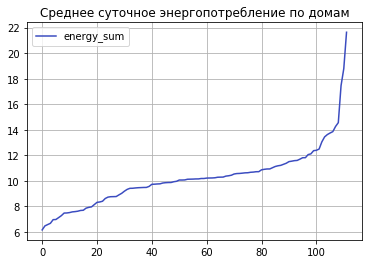

In [19]:
#построим график распределения ССЭД по домам
daily_data.groupby('house_id')['energy_sum'].mean().sort_values().reset_index().plot(
    use_index=True, 
    grid = True,
    y = 'energy_sum',
    colormap = 'coolwarm', 
    title = 'Среднее суточное энергопотребление по домам')

Наблюдается очень большое различие (более, чем в три раза) в среднем суточном энергопотреблении домохозяйств в различных домах. 

Дополнительно посмотрим распределение максимального суточного энергопотребления по домам.

In [20]:
#получим распределение максимального суточного энергопотребления по домам
daily_data.groupby('house_id')['energy_sum'].max().sort_values()

house_id
108     38.076000
102     43.200000
92      47.351000
101     49.491000
96      50.488000
106     51.754000
55      52.488000
75      54.790000
97      56.510000
88      56.592000
103     57.569000
43      59.056000
59      59.247000
95      59.718000
80      60.372000
98      60.644000
70      61.497000
87      62.029000
84      62.214000
79      62.891000
62      64.349000
51      64.956000
78      65.272000
107     65.972000
109     65.982000
105     66.367000
83      66.476000
81      67.235000
13      67.558000
52      67.945000
          ...    
29     122.551999
56     125.058000
21     130.023001
57     131.673000
9      132.983000
17     136.560000
72     137.891000
48     139.511000
15     141.108999
32     142.018000
110    150.362001
8      150.871000
64     150.886001
1      153.685000
33     159.427000
68     161.177000
6      162.868001
14     164.000999
34     165.868001
11     166.954000
40     175.757999
10     176.024000
2      185.322000
24     198.497999
3

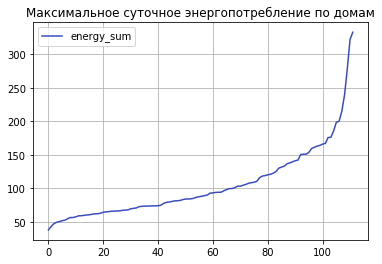

In [21]:
#построим график распределения максимального суточного энергопотребления домохозяств по домам
daily_data.groupby('house_id')['energy_sum'].max().sort_values().reset_index().plot(
    use_index=True, 
    grid = True,
    y = 'energy_sum',
    colormap = 'coolwarm', 
    title = 'Максимальное суточное энергопотребление по домам')

Наблюдаем чудовищные по нашим меркам величины суточного энергопотребления, в домах 41 и 12 превышающие 300 КВт. При этом различие в максимальном суточном энергопотреблении между различными домами могут превышать 8 раз. Предположительно, это связано с разным уровнем благосостояния домохозяйств.

Выясним дополнительно, как распределено среднесуточное энергопотребление по потребителям из одного дома. Выберем дома с наибольшим (дом 0) и наименьшим (дом 109) среднесуточным энергопотреблением.

In [22]:
#получим распределение среднего энергопотребления в доме номер 0.
daily_data[daily_data['house_id']==0].groupby('LCLid')['energy_sum'].mean().sort_values()

LCLid
MAC004387      4.301469
MAC005492      7.513719
MAC003239      7.592194
MAC003281      9.401489
MAC003557      9.985136
MAC003718     10.025244
MAC003737     10.106722
MAC003740     10.331188
MAC003826     10.621621
MAC003646     10.672151
MAC003579     10.987384
MAC003874     11.137008
MAC004034     11.255864
MAC003348     11.780209
MAC000002     12.096094
MAC003400     12.211802
MAC003805     12.764579
MAC003252     12.885370
MAC003482     13.165935
MAC003851     13.468082
MAC003719     13.682571
MAC003863     13.961464
MAC003844     14.636379
MAC003463     15.514264
MAC003305     15.768039
MAC003686     16.290656
MAC000246     16.834822
MAC003680     17.024738
MAC003553     17.297380
MAC003656     17.772700
MAC003423     17.953159
MAC003422     19.043032
MAC003223     19.207395
MAC004431     21.530118
MAC004247     21.769184
MAC003817     21.964785
MAC001074     23.277090
MAC003428     26.244207
MAC003394     27.510990
MAC003597     28.805513
MAC003388     28.941310
MAC003566 

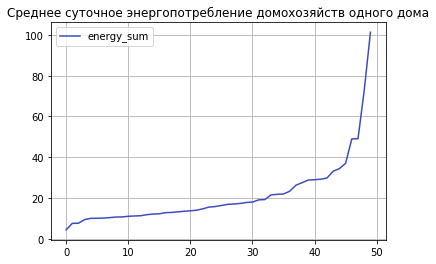

In [23]:
#построим график распределения ССЭД по домохозяйствам дома 0
daily_data[daily_data['house_id']==0].groupby('LCLid')\
['energy_sum'].mean().sort_values().reset_index().plot(
    use_index=True, 
    grid = True,
    y = 'energy_sum',
    colormap = 'coolwarm', 
    title = 'Среднее суточное энергопотребление домохозяйств одного дома')

Наблюдаются очень большие (в 25 раз) различия в среднесуточном энергопотреблении домохозяйств дома номер 0.

In [24]:
#получим распределение среднего энергопотребления в доме номер 109.
daily_data[daily_data['house_id']==109].groupby('LCLid')['energy_sum'].mean().sort_values()

LCLid
MAC002594     0.002153
MAC000408     0.517863
MAC002258     1.125498
MAC002315     2.265295
MAC002642     2.465374
MAC000392     2.593246
MAC002270     2.981672
MAC002294     3.060220
MAC002196     3.218163
MAC002237     3.253000
MAC002629     3.420530
MAC000549     3.540303
MAC003707     3.613937
MAC002632     3.884347
MAC000236     3.966871
MAC000316     3.967104
MAC002607     4.062084
MAC002364     4.133712
MAC002365     4.340441
MAC002206     4.398914
MAC002276     4.584094
MAC002229     4.744723
MAC005369     5.085899
MAC000292     5.109521
MAC000305     5.615452
MAC002308     5.617095
MAC002638     5.905748
MAC002298     6.343636
MAC005381     6.527193
MAC000293     6.832580
MAC000529     6.912482
MAC002382     6.941793
MAC000402     7.241401
MAC002274     7.407226
MAC002248     7.674629
MAC002287     7.835530
MAC005547     7.866456
MAC002234     8.699940
MAC002576     8.710142
MAC000583     8.772545
MAC002293    10.400087
MAC002209    10.583399
MAC002379    11.174508
MAC00

Неожиданно в этом доме наблюдаются еще большие различия в среднесуточном энергопотреблении (более 8000 раз). Интересно узнать максимальный уровень суточного энергопотребления домохозяйства, имеющего минимальное среднесуточное энергопотребление (датчик MAC002594).

In [26]:
#определим максимальное суточное энергопотребления в домохозяйтстве с датчиком MAC002594
daily_data[daily_data['LCLid']=='MAC002594']['energy_sum'].max()

0.8540000000000001

Даже максимальное энергопотребление довольно низкое. По классификации ACORN это домохозяйство группы ACORN-Q с условным названием 'Difficult Circumstances' - "Сложные обстоятельства", что многое объясняет. В то же время, другое домохозяйство (датчик MAC005545) из этого же дома, имеющее в 8000 раз большее энергопотребление, также относится к группе ACORN-Q. Это наводит на мысль, что помимо уровня благосостояния , на энергопотребление существенно влияет образ жизни членов домохозяйств. В данном случае, возможно домохозяйство представлено одним человеком, приходящим домой только для сна.

Посмотрим, как влияет форма оплаты за электроэнергию и категория потребителей по системе ACORN на показатели энергопотребления.

In [27]:
#загрузим информацию о потребителях 
households = pd.read_csv('./data/informations_households.csv')
#проверим
households.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [28]:
#добавим в датафрейм daily_data столбцы stdorToU и Acorn из датафрейма households
daily_data = daily_data.merge(households[['LCLid', 'stdorToU', 'Acorn']], on='LCLid', how='left')
#посмотрим на результат
daily_data.head()

,LCLid,house_id,day,energy_sum,year,month,isoweekday,stdorToU,Acorn
0,MAC000041,98,2011-12-09,11.301,2011,12,5,Std,ACORN-Q
1,MAC000041,98,2011-12-10,9.929,2011,12,6,Std,ACORN-Q
2,MAC000041,98,2011-12-11,7.936,2011,12,7,Std,ACORN-Q
3,MAC000041,98,2011-12-12,7.500,2011,12,1,Std,ACORN-Q
4,MAC000041,98,2011-12-13,9.753,2011,12,2,Std,ACORN-Q


In [29]:
#получим распределение ССЭД по формам оплаты за электроэнергию
daily_data.groupby('stdorToU')['energy_sum'].mean()

stdorToU
Std    10.323564
ToU     9.534193
Name: energy_sum, dtype: float64

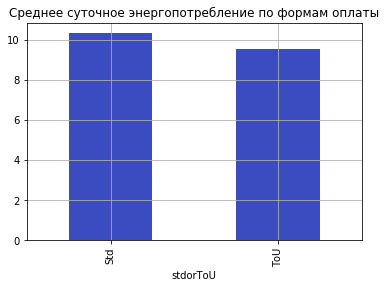

In [30]:
#построим диаграмму распределения ССЭД по формам оплаты за электроэнергию
daily_data.groupby('stdorToU')['energy_sum'].mean().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Среднее суточное энергопотребление по формам оплаты')

Наблюдаем незначительную зависимость энергопотребления от формы оплаты. Оплату, зависящую от времени суток, используют более экономные домохозяйства.

In [31]:
#получим распределение среднего суточного энергопотребления домохозяйства по группам Acorn
daily_data.groupby('Acorn')['energy_sum'].mean()

Acorn
ACORN-     12.052589
ACORN-A    19.136536
ACORN-B    11.956417
ACORN-C    11.993320
ACORN-D    13.627393
ACORN-E    10.390934
ACORN-F     9.225938
ACORN-G    10.206903
ACORN-H    11.045956
ACORN-I     9.474216
ACORN-J    11.399968
ACORN-K    10.059012
ACORN-L    10.066791
ACORN-M    10.031389
ACORN-N     9.263106
ACORN-O     8.580450
ACORN-P     6.644264
ACORN-Q     7.597931
ACORN-U    11.684697
Name: energy_sum, dtype: float64

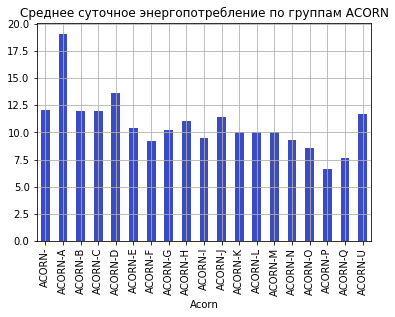

In [32]:
#построим диаграмму распределения ССЭД по по группам Acorn
daily_data.groupby('Acorn')['energy_sum'].mean().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Среднее суточное энергопотребление по группам ACORN')

Видим очень существенные различия в энергопотреблении различных демогеографических групп населения. Максимальное среднее суточное энергопотребление (19.14 КВт) наблюдается в группе ACORN-A ('Lavish Lifestyles' - "Щедрый образ жизни"). Минимальное энергопотребление (6.64 КВт) - в группе ACORN-P ('Struggling Estates' - "Борющиеся имения").